Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


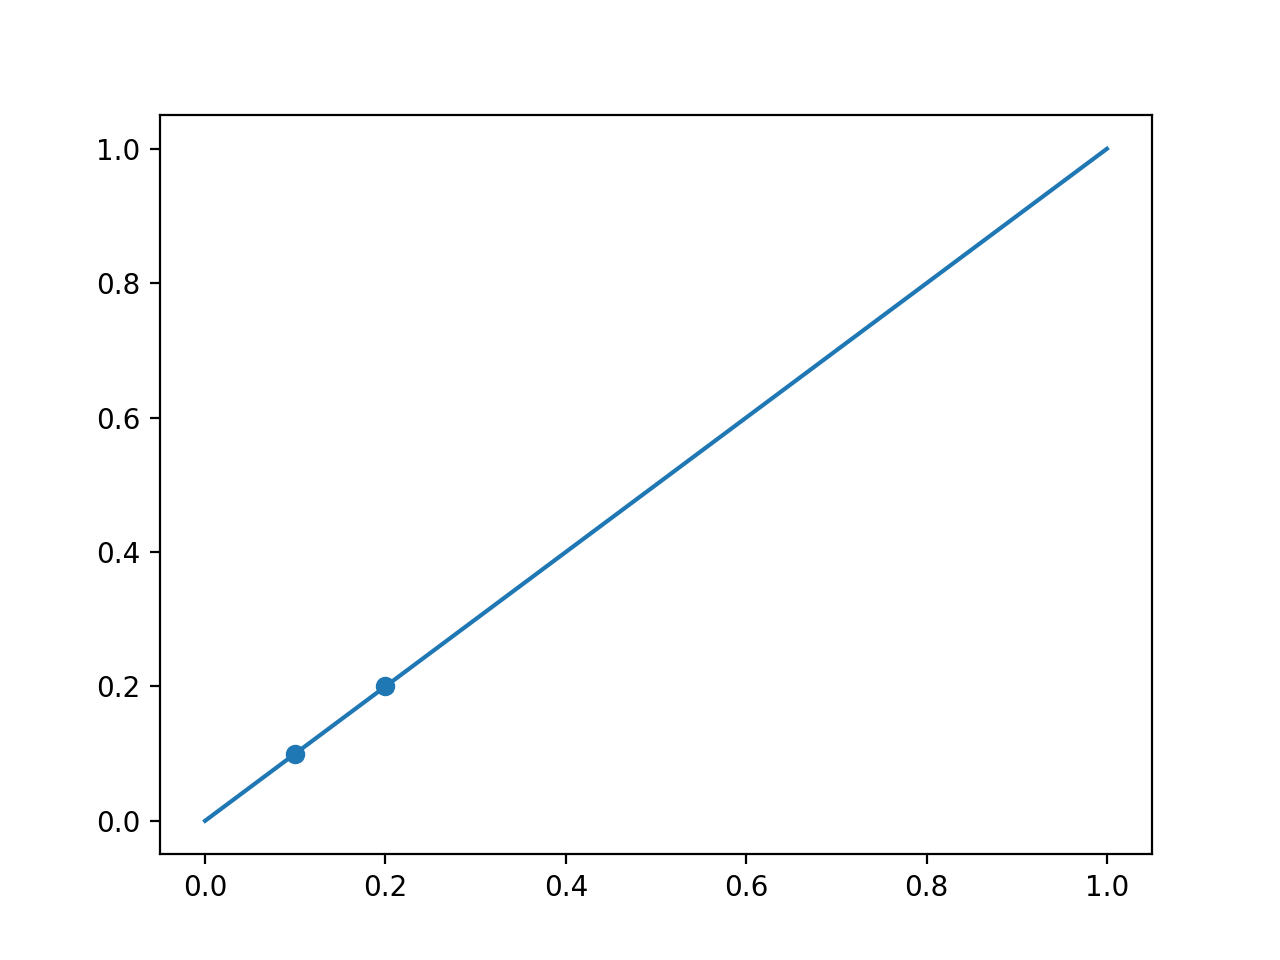

In [1]:
get_ipython().magic('pylab notebook')
import ipywidgets as widgets
import scipy.stats
# //////////////////////////////////////////////////////////////////
w = widgets.HTML()
fig, ax = plt.subplots()

# set flag for random initialisation:
rand_init = False

# use simple lists for data storage, because somehow the numpy append did nothing
if rand_init:
    x = [np.random.rand() for i in range(2)]
    y = [np.random.rand() for i in range(2)]
else:
    x = [0.1, 0.2]
    y = [0.1, 0.2]
# scatter plot initial data
ax.scatter(x, y)
# do initial regression line
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
xrange = np.arange(0,1.01,0.1)
# plot initial linreg line
plt.plot(xrange, intercept + slope*xrange)

def onclick(event):
    w.value = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
              event.button, event.x, event.y, event.xdata, event.ydata)
    
    x.append(float(event.xdata))
    y.append(float(event.ydata))
    # ax.text.pop(0)
    
    # plot new point
    ax.scatter(event.xdata, event.ydata)
    
    # pop the current line from axes
    ax.lines.pop(0) 
    
    # redo regression with updated points
    #if len(x) > 2:
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    # plot new line
    ax.plot(xrange, intercept + slope*xrange)
    ax.text(0.3,0.8,"R-value = %.2f" % r_value, bbox=dict(facecolor='white', alpha=1.0))
    ax.text(0.3,0.9,"P-value = %.2f" % p_value, bbox=dict(facecolor='white', alpha=1.0))



cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)

## Interpretation

R-value:

(from http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

What Is R-squared?

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.

R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!



## P-value

The p-value is a measure of the statistical relationship between the two variables: a larger p-value makes a correlation between the variables more likely.

Formally speaking, the p-value is a measure for the distance to the null-hypothesis that the variables are not correlated (i.e.: a straight line).

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
!pwd